# Project Studi Case : Prediction Consumers Fashion Retail

## Understanding Business 

Dataset yang digunakan yaitu [Consumer Fashion Retail](https://archive.ics.uci.edu/dataset/352/online+retail). membangun model machine learning untuk memprediksi Konsumen Retail Fashion yang berpotensi churn

| Variable Name | Role     | Type       | Description                                             | Units   | Missing Values |
|---------------|----------|------------|---------------------------------------------------------|---------|----------------|
| InvoiceNo     | ID       | Categorical| A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation | - | no |
| StockCode     | ID       | Categorical| A 5-digit integral number uniquely assigned to each distinct product | - | no |
| Description   | Feature  | Categorical| Product name | - | no |
| Quantity      | Feature  | Integer    | The quantities of each product (item) per transaction  | - | no |
| InvoiceDate   | Feature  | Date       | The day and time when each transaction was generated   | - | no |
| UnitPrice     | Feature  | Continuous | Product price per unit                                  | sterling | no |
| CustomerID    | Feature  | Categorical| A 5-digit integral number uniquely assigned to each customer | - | no |
| Country       | Feature  | Categorical| The name of the country where each customer resides     | - | no |


# Smart Question

1. Specific:
   - Apa jenis produk yang paling banyak terjual, berdasarkan StockCode?
   
2. Measurable:
   - Berapa rata-rata jumlah produk yang terjual dalam setiap transaksi?

3. Action-oriented:
   - Dapatkah kita mengklasifikasikan pelanggan berdasarkan negara tempat mereka tinggal?

4. Relevant:
   - Seberapa pentingnya pemahaman pola pembelian pelanggan dalam meningkatkan retensi pelanggan?

5. Time-bound:
   - Bisakah kita mengidentifikasi periode waktu tertentu yang memiliki peningkatan atau penurunan signifikan dalam jumlah transaksi?

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import matplotlib.ticker as ticker
import missingno as ms
import warnings


warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.style.use('Solarize_Light2')

# Data Preparation

## Gathering Data

In [2]:
# fetch dataset
online_retail = fetch_ucirepo(id=352)

In [3]:
df_metadata = online_retail.metadata

print(df_metadata)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [4]:
df_variables = online_retail.metadata

print(df_variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [5]:
df = pd.read_excel("./data/Online Retail.xlsx")

In [6]:
print("Data Para Konsumen Fashion Retail : ",df.head(10))

Data Para Konsumen Fashion Retail :    InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0

## Assesing Data

### Infomation Tabel Consumers Fashion Retail

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Terdapat 541,909 entri dalam dataset ini.
- Kolom Description memiliki 1,454 nilai yang hilang (null).
- Kolom CustomerID memiliki 135,080 nilai yang hilang (null), yang berarti sebagian besar transaksi tidak terkait dengan pelanggan tertentu.
- Data ini memiliki beberapa tipe data, termasuk objek (string), integer, float, dan datetime.

Missing Value

Kolom Description dan CustomerID

In [8]:
print("DataFrame Consumers Fashion Retail : ")
print(df.isna().sum())

DataFrame Consumers Fashion Retail : 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

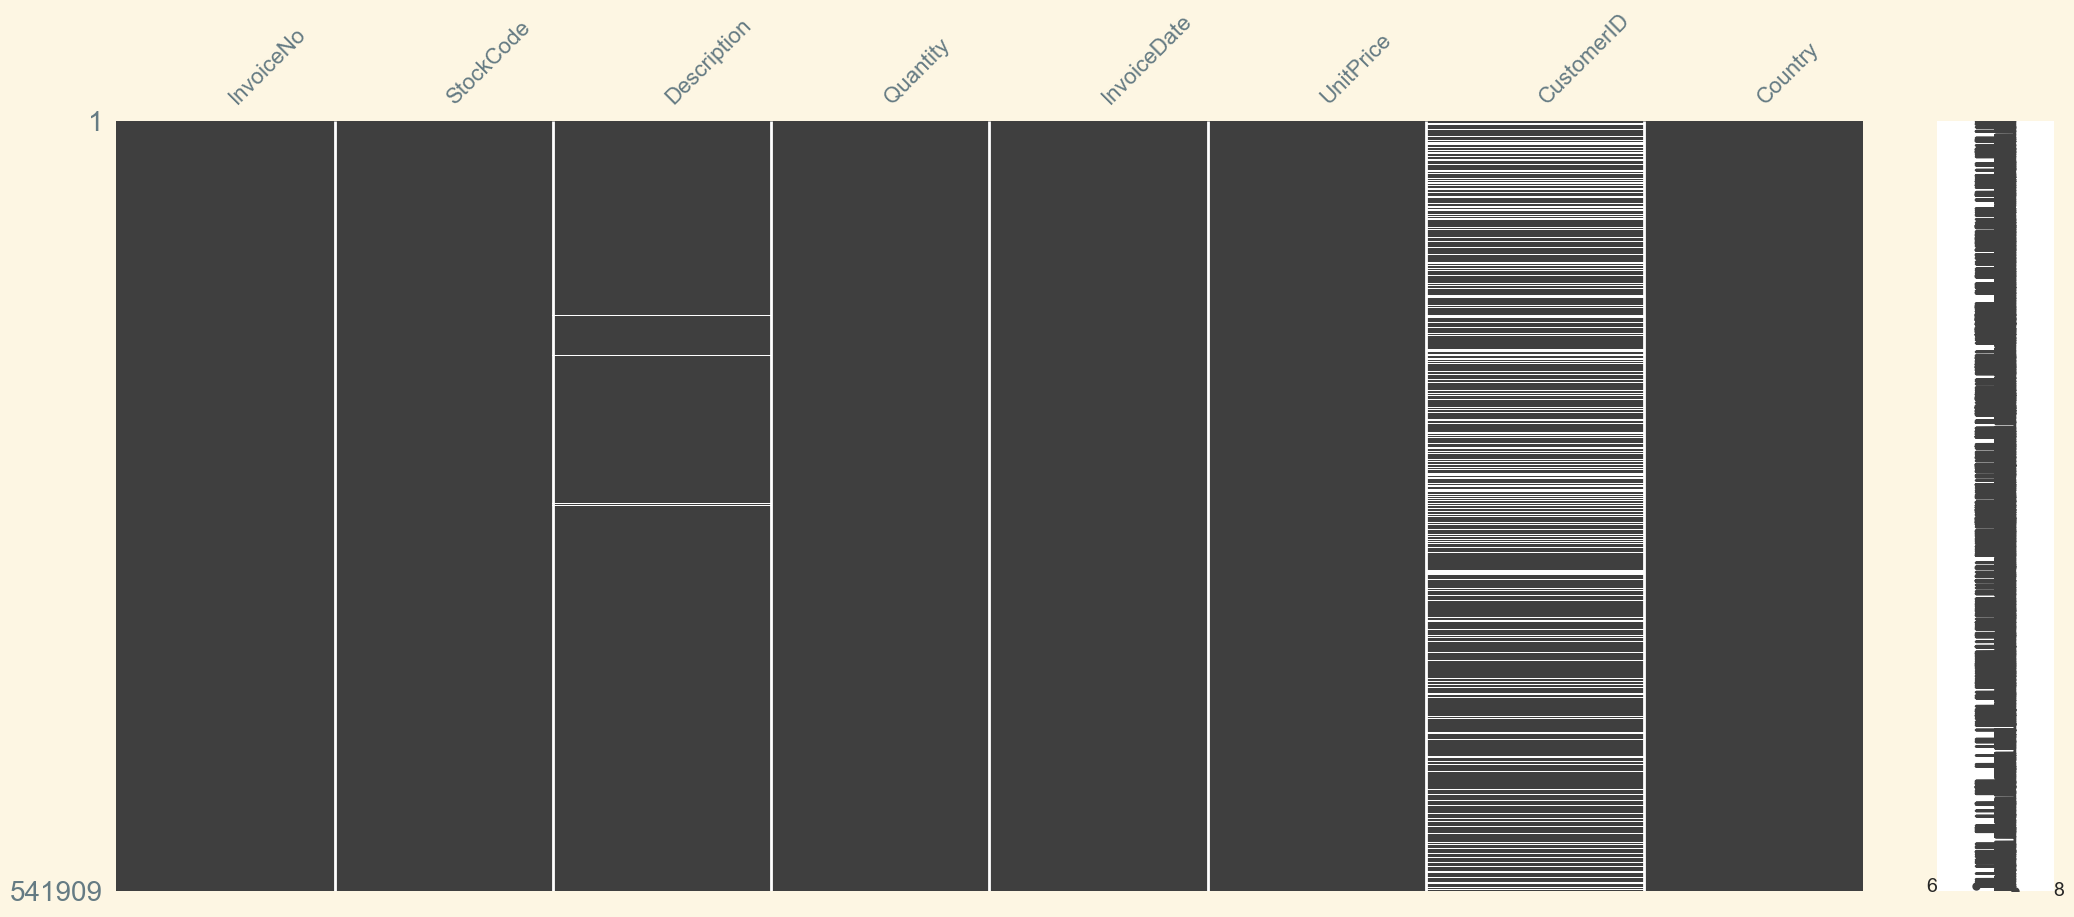

In [9]:
ms.matrix(df)

In [10]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
117874,546406,85202,HANGING WOOD AND FELT HEART,2,2011-03-11 16:21:00,0.79,NaN,United Kingdom
533039,581006,21162,TOXIC AREA DOOR HANGER,24,2011-12-07 08:45:00,0.39,14911.0,EIRE
452218,575328,M,Manual,1200,2011-11-09 13:48:00,0.25,17857.0,United Kingdom
511636,579508,20728,LUNCH BAG CARS BLUE,5,2011-11-29 16:33:00,4.13,NaN,United Kingdom
249322,558902,21974,SET OF 36 PAISLEY FLOWER DOILIES,12,2011-07-04 16:08:00,1.45,13001.0,United Kingdom
161150,550471,22728,ALARM CLOCK BAKELIKE PINK,1,2011-04-18 13:52:00,7.46,NaN,United Kingdom
182594,552558,22841,ROUND CAKE TIN VINTAGE GREEN,2,2011-05-10 11:33:00,7.95,14766.0,United Kingdom
104774,545215,21658,GLASS BEURRE DISH,1,2011-02-28 16:47:00,8.29,NaN,United Kingdom
513929,579629,23078,ICE CREAM PEN LIP GLOSS,24,2011-11-30 12:16:00,1.25,14963.0,United Kingdom
288566,562173,23215,JINGLE BELL HEART ANTIQUE SILVER,24,2011-08-03 12:12:00,2.08,14530.0,United Kingdom


Duplicated Data

In [11]:
print('Jumlah Duplikasi : ', df.duplicated().sum())

Jumlah Duplikasi :  5268


Descriptive analysis Statistic

In [12]:
df.describe().style.background_gradient(cmap='RdPu')

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,nan,96.759853,1713.600303


- jumlah data entries ada : 541909 Data
- Q1 dan Q3 Quantity : 1.25 and 4.13
- Standard Deviation Quantity : 218.08
- mean Quantity : 9.55%
- mean UnitPrice : 4.61% 
- mean CustomerID : 15287 Customer

### Cleaning Data

#### Metode Imputation

Kolom Description missing values 1454

In [13]:
df[df.Description .isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
df.Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [15]:
# df['Description'].fillna(df['Description'].mean(), inplace=True)
df['Description'].fillna('Unknown', inplace=True)

print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Kolom Customer missing values 135.080

In [16]:
df[df.CustomerID .isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Unknown,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [17]:
df.CustomerID.value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [18]:
# Menghapus kolom 'CustomerID' dari DataFrame
df = df.drop(columns=['CustomerID'])

In [19]:
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [21]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True, drop=True)

print("Jumlah Data yang duplicate", df.duplicated().sum())

Jumlah Data yang duplicate 0


In [22]:
# Mengkoreksi nilai negatif pada Quantity menjadi nilai positif
df['Quantity'] = df['Quantity'].apply(lambda x: max(0, x))

# Mengkoreksi nilai negatif pada UnitPrice menjadi nilai positif
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: max(0, x))

In [23]:
df.describe().style.background_gradient(cmap='RdPu')

,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,10.519172,2011-07-04 08:57:06.087421952,4.673883
min,0.000000,2010-12-01 08:26:00,0.000000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,156.036720,nan,94.856938


# Exploratory Data Analysis (EDA)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.7+ MB


In [45]:
# Focus on StockCode and Quantity columns
df_stock_quantity = df[["StockCode", "Quantity"]]

# Calculate total quantity sold for each StockCode
stock_quantity_sold = df_stock_quantity.groupby(
    "StockCode")["Quantity"].sum().reset_index()

# Sort by total quantity sold in descending order
stock_quantity_sold = stock_quantity_sold.sort_values(
    "Quantity", ascending=False)

# Top 10 StockCodes with highest total quantity sold
top_10_stockcodes = stock_quantity_sold.head(10)

print("Top 10 StockCodes with highest total quantity sold:")
print(top_10_stockcodes)

Top 10 StockCodes with highest total quantity sold:
     StockCode  Quantity
2429     23843     80995
1983     23166     78033
1070     22197     56898
2622     84077     54951
3659    85099B     48375
3670    85123A     41645
377      21212     36396
2735     84879     36362
1905     23084     31673
1335     22492     26633


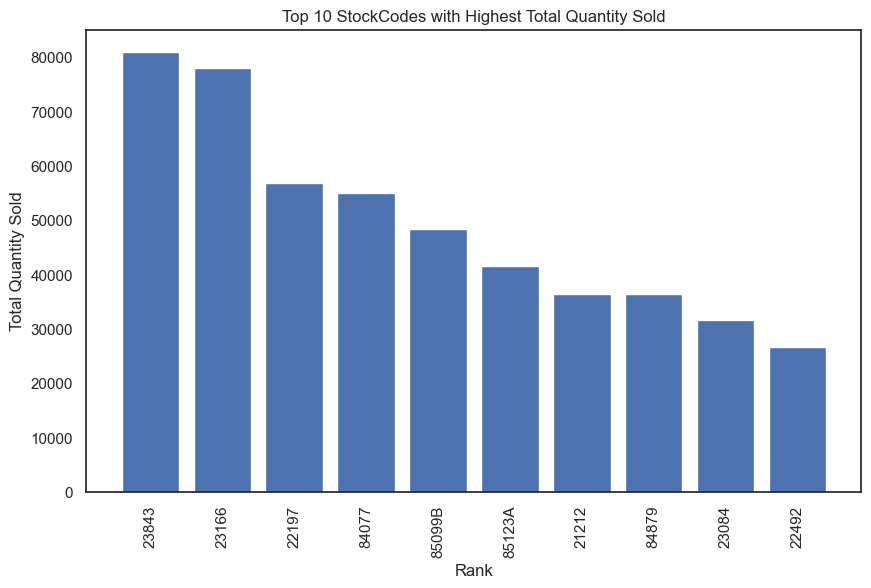

In [48]:
# Plot bar chart of top 10 StockCodes

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_stockcodes)), top_10_stockcodes["Quantity"])
plt.xlabel("Rank")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 StockCodes with Highest Total Quantity Sold")

# Add StockCode labels to each bar
plt.xticks(range(len(top_10_stockcodes)),
        top_10_stockcodes["StockCode"], rotation=90)

plt.show()